In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pydub import AudioSegment #To overlay Audio files
import librosa #To Spectogram from Audio files

#플랏 사이즈 결정 15인치 4인치
plt.rcParams["figure.figsize"] = (15,4)

In [2]:
#합성할 파일 불러오기.
sound1 = AudioSegment.from_mp3("sound_1.mp3") #잊지마!! 스캇스캇
sound2 = AudioSegment.from_mp3("some.mp3")
y1, sr1 = librosa.load('sound_1.mp3')
y2, sr2 = librosa.load('some.mp3')

In [3]:
print(y1.shape,y2.shape)

(7607232,) (3999768,)


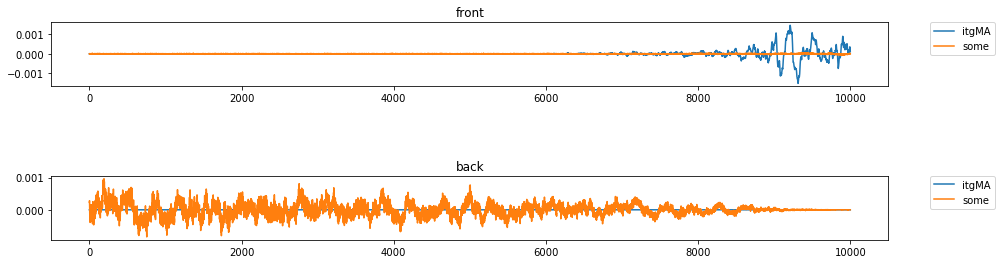

In [4]:
plt.subplot(311)
plt.plot(y1[:10000],label='itgMA')
plt.plot(y2[:10000],label='some')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('front')

plt.subplot(313)
plt.plot(y1[-10000:],label='itgMA')
plt.plot(y2[-10000:],label='some')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('back')

plt.show()

랩 과 발라드?의 주파수가 확실히 다른거 같다.

두 음악을 합쳤을때 결과를 보자.

In [5]:
# mix sound2 with sound1, starting at 5000ms into sound1)
sound1_over_sound_2 = sound1.overlay(sound2, position=0)
sound2_over_sound_1 = sound2.overlay(sound1, position=0)

# save the result
sound1_over_sound_2.export("sound1_over_sound_2.mp3", format="mp3")
sound1_over_sound_2.export("sound1_over_sound_2.wav", format="wav")

<_io.BufferedRandom name='sound1_over_sound_2.wav'>

In [6]:
from IPython.display import Image

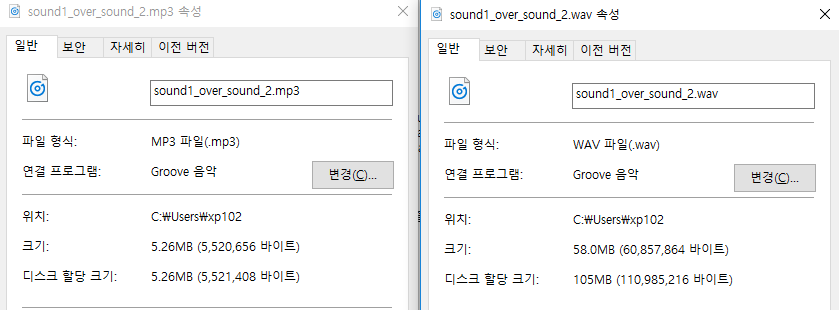

In [7]:
Image(filename='C:\\Users\\xp102\\Desktop\\캡처.PNG')

7MB + 5MB 는 12MB가 아니라...

WAV 형식 == 58 MB   
MP3 형식 == 5.26 MB 

압축방식이 달라 파일 크기에서 차이가 난다.

## 차이점은 어떤점이 있을까?

In [8]:
y3, sr3 = librosa.load('sound1_over_sound_2.wav')
y4, sr4 = librosa.load('sound1_over_sound_2.mp3')

In [10]:
print(y3.shape, y4.shape)
print(sr3, sr4)

(7607228,) (7607228,)
22050 22050


주파수 길이의 변화는 없어 보인다.

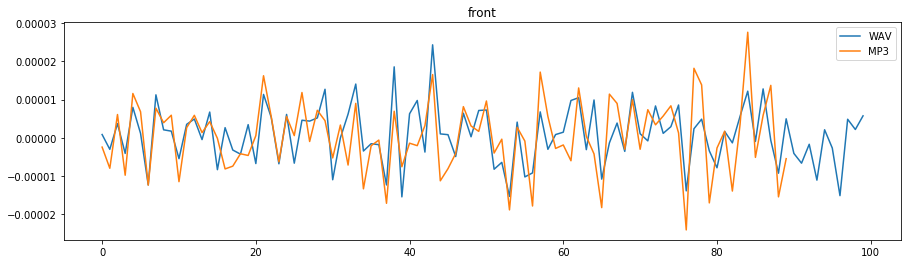

In [19]:
plt.plot(y3[:100], label='WAV')
plt.plot(y4[:90], label='MP3')
plt.legend()
plt.title('front')

plt.show()

주황색이 MP3(손실 압축)인데 간혹 더 높은 구간이 보인다.

사람이 듣기에는 비슷하다고 하니 데이터 쪽으로도 별 문제가 없는걸까?

# 기타 사용법

In [ ]:
# Slice audio 
# pydub는 milliseconds 단위를 사용한다 
ten_seconds = 10 * 1000 
one_min = ten_seconds * 6 

first_10_seconds = sound1[:ten_seconds]

In [5]:
# up/down volumn  + 20dB
beginning = first_10_seconds + 20

In [22]:
beginning.export('result.wav', format='wav', parameters=["-q:a", "10", "-ac", "1"])

<_io.BufferedRandom name='result.flac'>

In [6]:
#audio 길이.. 너무 간편한데?
beginning.duration_seconds

10.0

In [28]:
# song is not modified
backwards = beginning.reverse()
backwards.export('backwards.wav', format='wav', parameters=["-q:a", "10", "-ac", "1"])

<_io.BufferedRandom name='backwards.wav'>

In [17]:
sound1.apply_mono_filter_to_each_channel

<bound method apply_mono_filter_to_each_channel of <pydub.audio_segment.AudioSegment object at 0x00000138DD3EF6D8>>